# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV as gscv 
from scipy.stats import expon, uniform

In [2]:
nb = pd.read_csv("C:/Users/ASUS/Downloads/Cancer_Data.csv")
nb.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Count Of the Rows and Columns 

In [3]:
nb.shape

(569, 33)

In [4]:
nb.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### Note
We have 33 columns of data The column "diagnosis" it is our target variable

Cancer Types:
1. Benign cancer (B)
2. Malignant cancer (M)

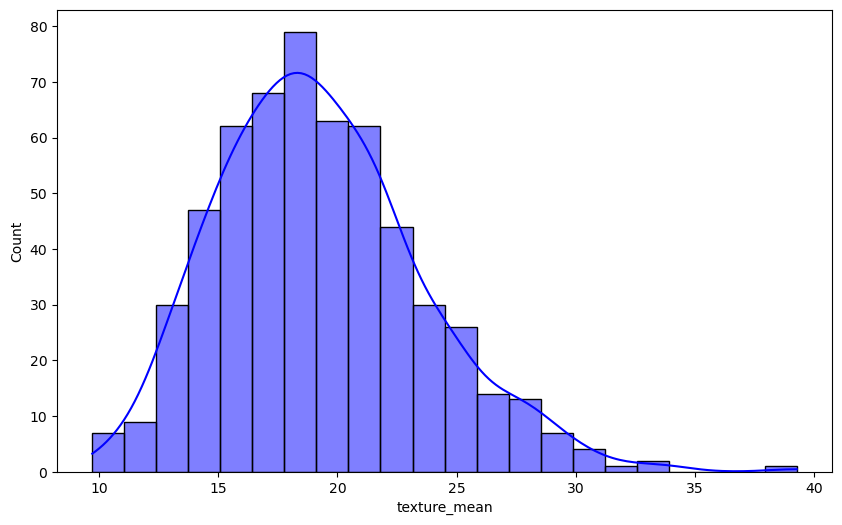

In [5]:
plt.figure(figsize= (10, 6))
sns.histplot(nb['texture_mean'], color = '#0000ff', kde= True);

# Data Cleaning, Correcting, Completing and Converting

### Check Null Columns

In [6]:
print('Train columns with null values:\n', nb.isnull().sum())

Train columns with null values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

We don't have any null values!

In [7]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### This function show 
        1.Column name 
        2.Non-null values 
        3.Count
        4.Data Type

In [8]:
nb['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

We can see that column 32 represents a column full of NaNs, and it's called "Unnamed:32". We will need to delete that later.

# Transforming the target column from categorical to numerical

In [9]:
nb['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [10]:
nb.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [11]:
nb['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

After trasforming Categorical to Numarical number of rows for each type. We can see that 357 212 = 569 (So all the data has been replaced)

# Exploratory Data Analysis

### Visualizing the categorical data in a pie chart

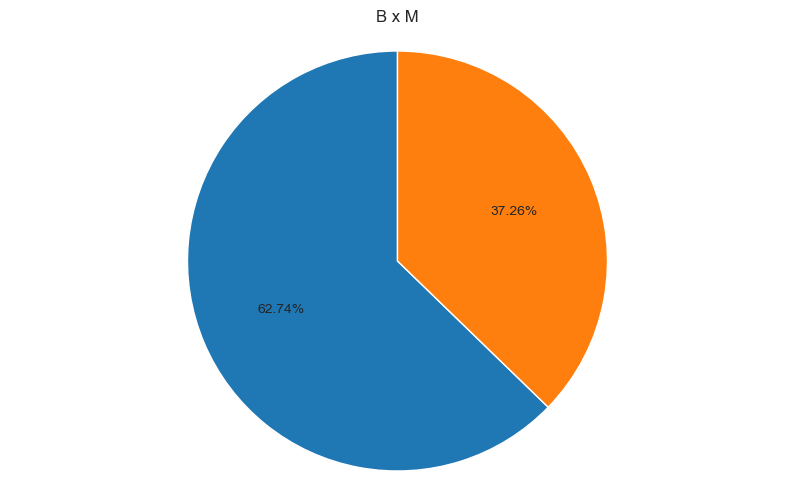

In [12]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(nb['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()

###  Visualizing the categorical data in to a Bar chart

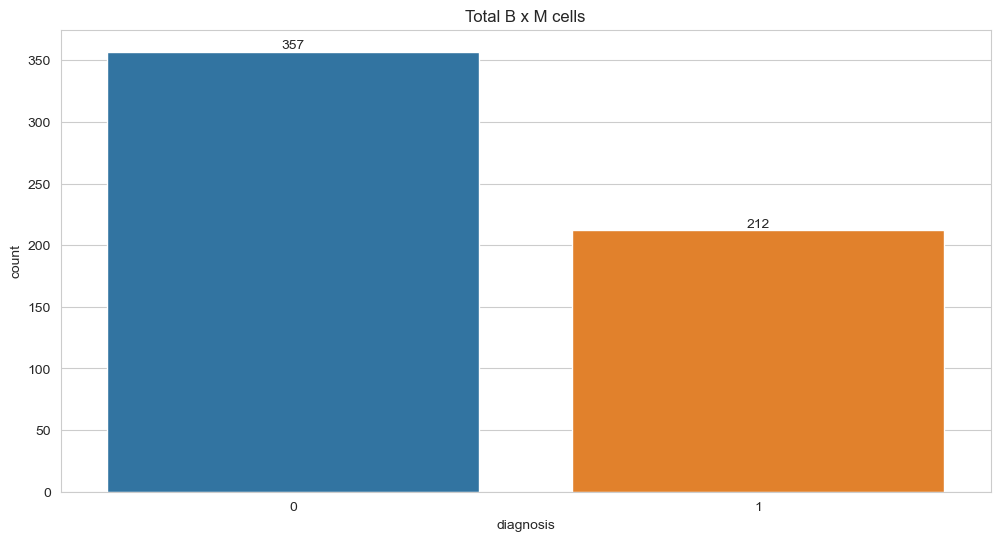

In [13]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=nb, x='diagnosis')
plt.title('Total B x M cells')
#plt.ylim([0,3000])
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

### Scatter polt for texture_mean against radius_mean for cancer types 

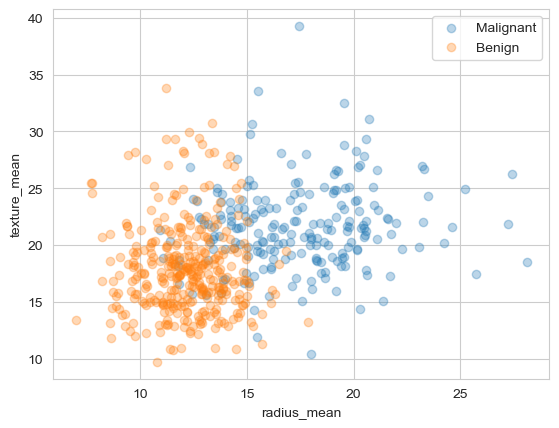

In [14]:
M = nb[nb.diagnosis == 1] #Diagnosis transfers all values of M to M data
B = nb[nb.diagnosis == 0] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean,label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

In [15]:
nb.groupby('diagnosis')[['radius_mean','texture_mean']].mean()

,radius_mean,texture_mean
diagnosis,,
0,12.146524,17.914762
1,17.462830,21.604906


Notes:

Malignant cells have a higher radius

### Heat map for the features in data set 

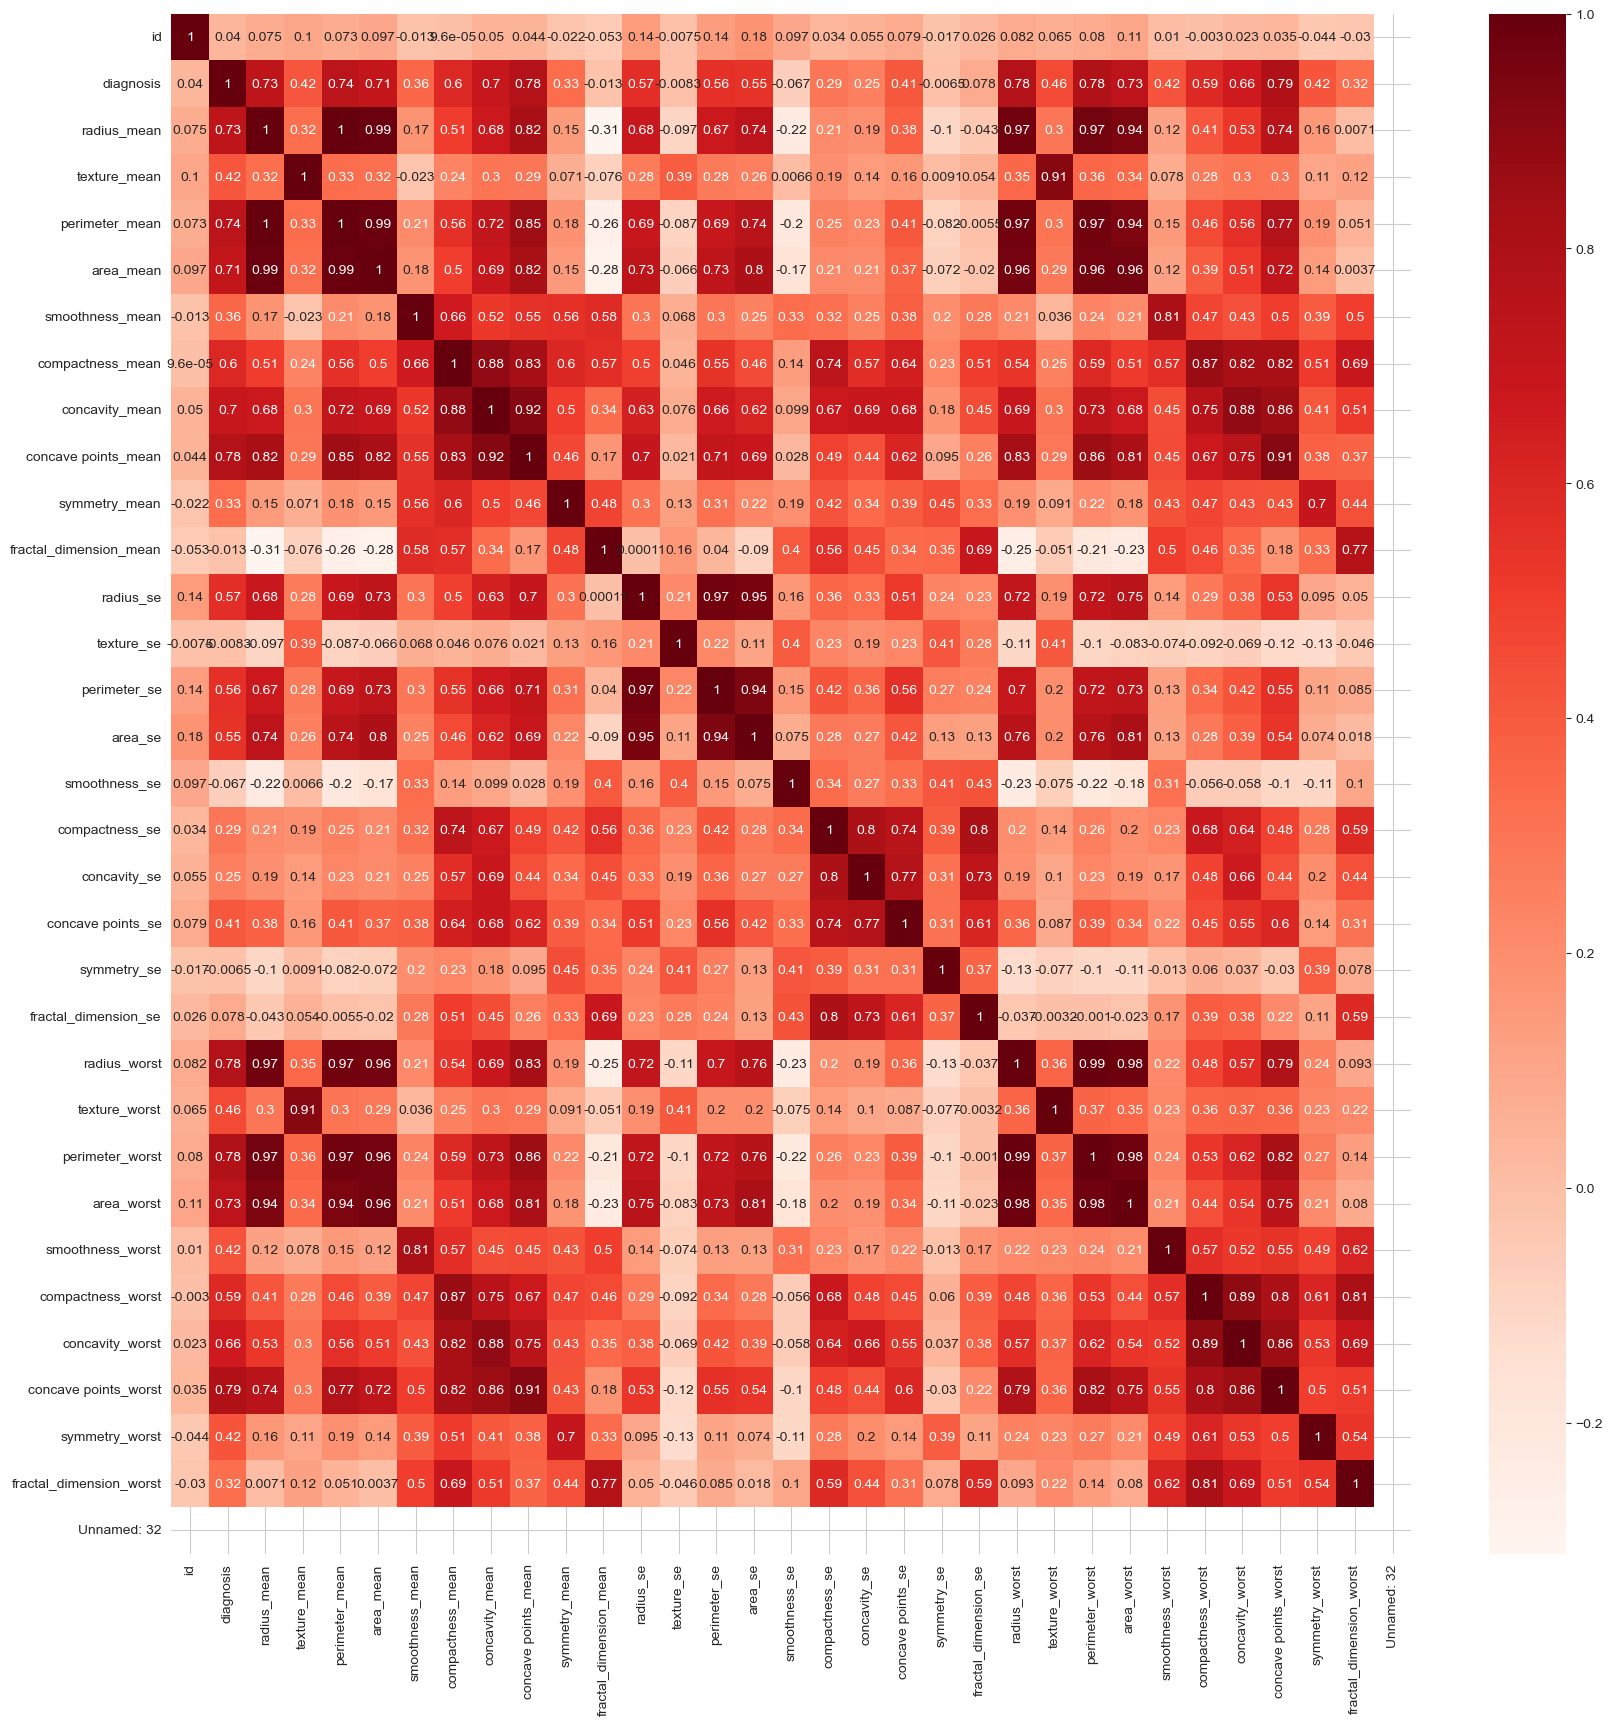

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(nb.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()

<Axes: xlabel='radius_mean', ylabel='Count'>

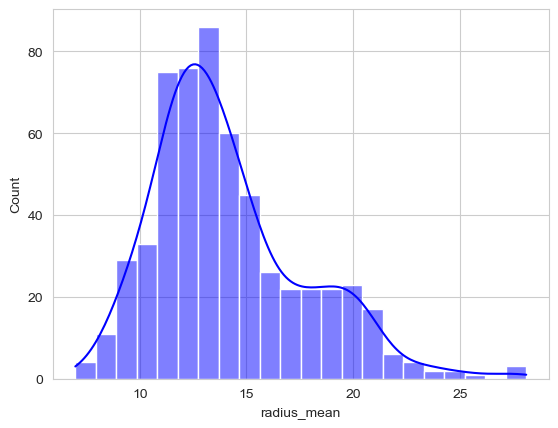

In [17]:
sns.histplot(nb['radius_mean'], color='#0000ff', kde='true')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>],
       [<Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave p

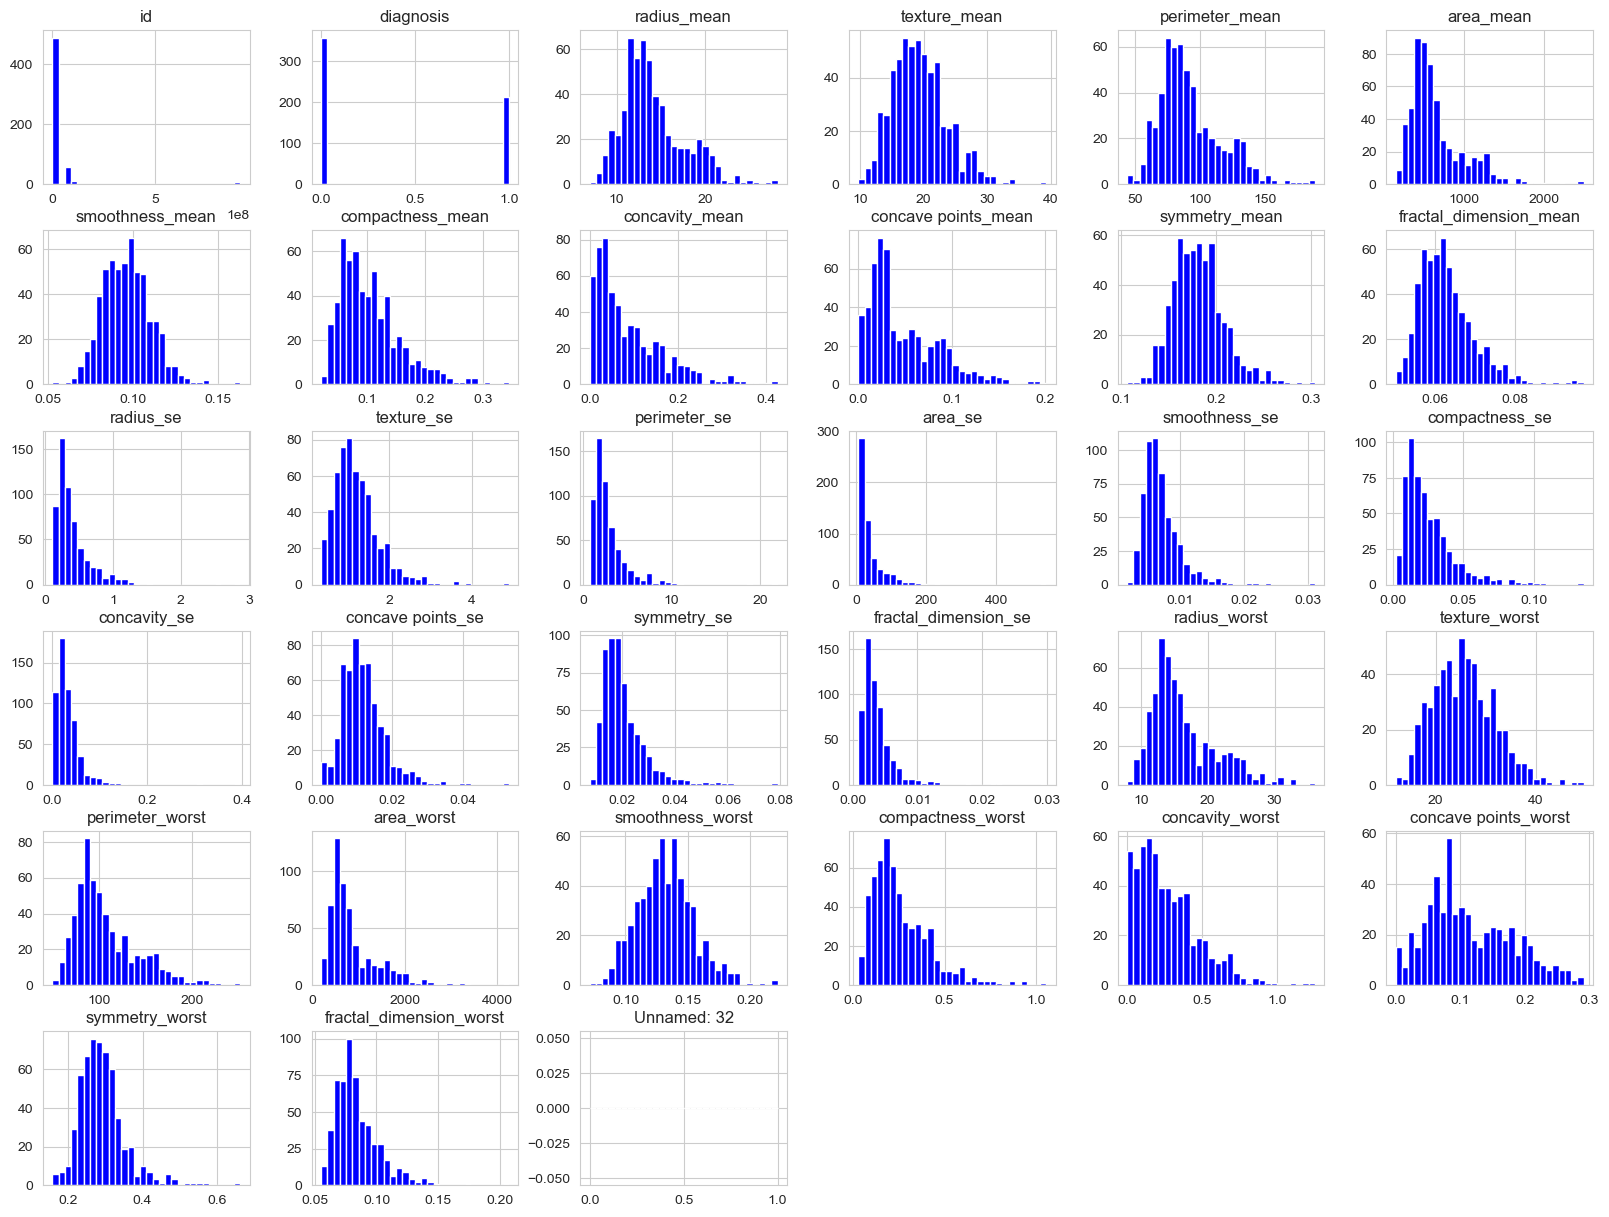

In [ ]:
nb.hist(bins=30, figsize=(20, 15), color = '#0000ff')

Measure the linear relationship between variables

In [ ]:
nb.corr()

In [ ]:
nb.shape

Dropping both "Unnamed: 32" and "Id" columns, to build our model

In [ ]:
nb = nb.drop(labels="Unnamed: 32", axis=1)
nb = nb.drop(labels="id", axis=1)

In [ ]:
nb.shape

After dropping the "Unnamed: 32" and "Id" columns

In [ ]:
nb.head()

separating the input features (X) and the target variable (y) from the original DataFrame

In [ ]:
X, y = nb.drop('diagnosis', axis=1), nb[['diagnosis']]

### Train test split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=43, stratify=y)

In [ ]:
model_dict = {}

# Naive Bayes

##### Applying the Naive Bayes to the data

In [ ]:
classifer = GaussianNB()
predictor = classifer.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_naive_bayes = accuracy_score(y_val, y_pred)
model_dict['naive_bayes'] = accuracy_naive_bayes
print(accuracy_naive_bayes)

In [ ]:
model_dict

In [ ]:
model_accuracies_nb = pd.DataFrame(columns=['Model', 'Accuracy'])
model_accuracies_nb['Model'] = model_dict.keys()
model_accuracies_nb['Accuracy'] = model_dict.values()

Name and the accuracy

In [ ]:
model_accuracies_nb

In [ ]:
model_accuracies_nb.sort_values(by = "Accuracy", ascending=False)

### Create a bar plot of the model accuracy 

In [ ]:

plt.figure(figsize=(6, 4))
plt.bar(model_dict.keys(), model_dict.values(), width=0.0000002)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim((0.0, 1.5))
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(model_dict.values()):
    plt.text(i, v, str(round(v, 3)), ha='center')
plt.show()